In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving titanic.csv to titanic.csv
{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.

  TITANIC SURVIVAL ANALYSIS USING NUMPY,PANDAS, AND MATPLOLIB

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Load dataset
df = pd.read_csv("titanic.csv")

In [ ]:
#Basic inspection
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\n DataTypes:\n", df.dtypes)


Shape of dataset: (891, 12)

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0   

Dataset overview(what's inside)
- Rows x Columns: 891 x 12
- key columns: survived, Pclass, sex, age, sibsp, parch, fare

In [ ]:
# Summmary Statistics
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
         PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   7

In [ ]:
# Missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#numpy operations
ages = df['Age'].dropna().values #drop NaN for numeric operations
print("\n Mean Age:",np.mean(ages))
print("Median Age:",np.median(ages))
print("Std Dev Age:", np.std(ages))


 Mean Age: 29.69911764705882
Median Age: 28.0
Std Dev Age: 14.516321150817316


Pandas Data Analysis

In [ ]:
#survival rate
survival_rate = df['Survived'].mean() * 100
print(f"\noverall survival rate: {survival_rate:.2f}%")


overall survival rate: 38.38%


In [ ]:
#Survival by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival Rate by gender:\n", survival_by_gender)


Survival Rate by gender:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [ ]:
#survival by class
survival_by_class = df.groupby("Pclass")['Survived'].mean() * 100
print("\n Survival rate by class:\n", survival_by_class)


 Survival rate by class:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [ ]:
#corelation between numeric columns
print("\n Correlation Matrix:\n", df.corr(numeric_only=True))


 Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


Visulization with matplotlib

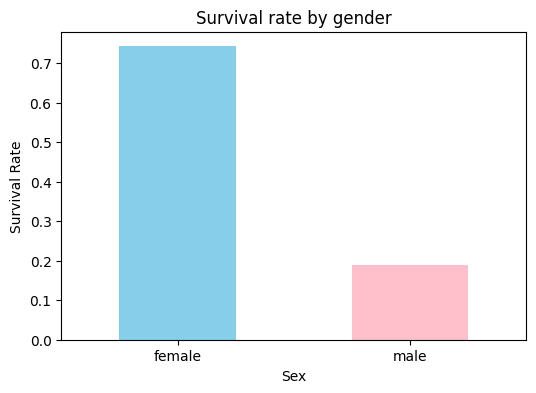

In [ ]:
#Gender vs Survival
plt.figure(figsize=(6,4))
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color = ['skyblue','pink'])
plt.title("Survival rate by gender")
plt.xticks(rotation=0)
plt.ylabel("Survival Rate")
plt.show()

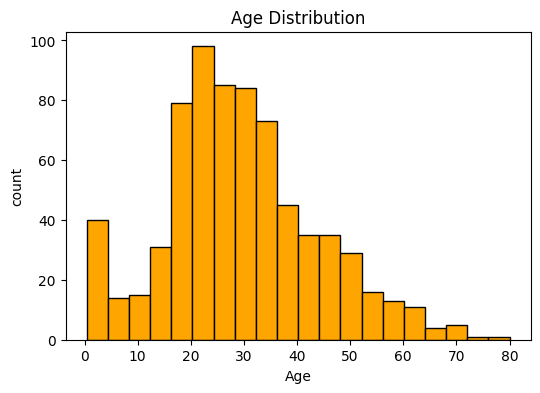

In [ ]:
#age distribution
plt.figure(figsize=(6,4))
plt.hist(df['Age'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

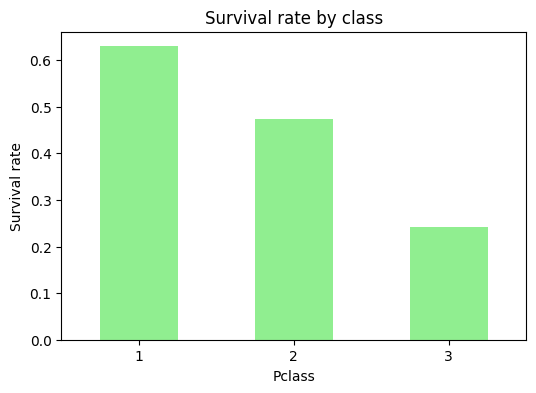

In [ ]:
#survival rate by class
plt.figure(figsize=(6,4))
df.groupby("Pclass")['Survived'].mean().plot(kind='bar', color='lightgreen')
plt.title("Survival rate by class")
plt.ylabel("Survival rate")
plt.xticks(rotation=0)
plt.show()

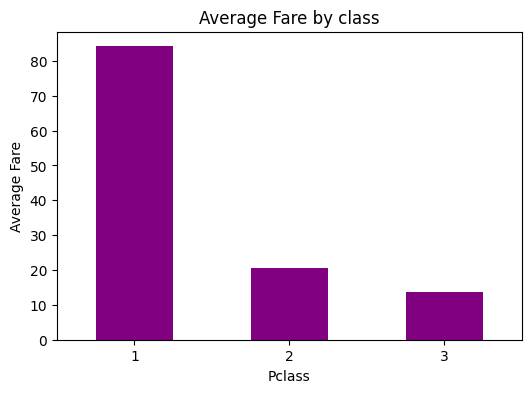

In [ ]:
#Fare Distributionby class
plt.figure(figsize=(6,4))
avg_fare_by_class = df.groupby('Pclass')['Fare'].mean()
avg_fare_by_class.plot(kind='bar', color='purple')
plt.title("Average Fare by class")
plt.ylabel("Average Fare")
plt.xticks(rotation=0)
plt.show()

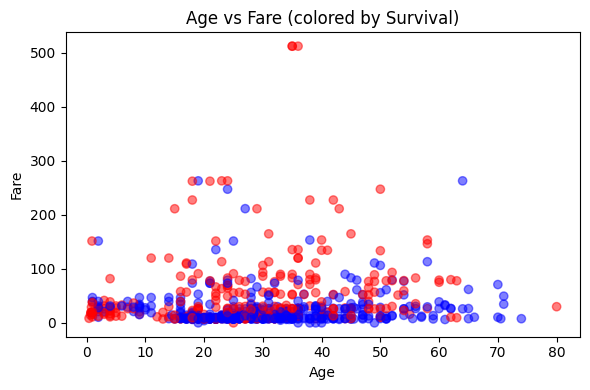

In [ ]:
#scatter plot between age vs fare
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Fare'], alpha=0.5, c=df['Survived'], cmap='bwr')
plt.title("Age vs Fare (colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

CONCLUSION

The data confirms a clear hirachy of survival on the titanic:
- women and 1st-class passengers had the highest chances.
- Childern did better than most adults; seniors had the worst outcomes.
- small families outperformed solo travelrs and large groups.
Money/class and social rules of the strongly shaped outcomes.
